In [1]:
## 数据摸索
import numpy as np   ###用于数值计算
import pandas as pd  ###用于数据处理和分析
import matplotlib.pyplot as plt   ###用于绘图
import matplotlib.gridspec as gridspec   ###用于更复杂的子图布局
###Jupyter Notebook中的魔法命令，用于在Notebook中内嵌绘图
%matplotlib inline   
import seaborn as sns   ###基于matplotlib的绘图库，用于制作统计图形
sns.set_style('whitegrid')  ##'whitegrid' 是其中一个可用的样式选项，它会在绘图区域后面添加一个白色的网格背景
##设置Seaborn的绘图风格为带有白色网格的背景
import datetime  ###用于日期和时间处理
import warnings  ###导入警告模块
warnings.filterwarnings('ignore')   ###忽略所有的警告信息

data = pd.read_csv('final_feature_all.csv')  ###使用pandas的read_csv函数读取名为final_feature_all.csv的CSV文件，并将数据存储在DataFrame对象data中
data.head(10)   ###使用DataFrame的head方法查看数据的前10行

,enrollment_id,all_opnum_1,all_opnum_2,all_opnum_3,all_opnum_4,all_opnum_5,all_opnum_6,all_opnum_7,all_opnum_8,all_opnum_9,...,thirty_day_max,thirty_day_sum,thirty_day_mean,thirty_day_std,username,course_id,course_num,nondropout_num,nondrop_precent,dropout
0,1,0,0,13,0,0,0,0,24,0,...,67,314,10,18.70,0,28,6,4.0,0.666667,0
1,3,28,0,0,0,3,0,0,30,0,...,64,288,9,18.36,1,9,3,3.0,1.000000,0
2,4,0,0,0,20,11,0,0,0,0,...,20,99,3,5.89,2,28,2,1.0,0.500000,0
3,5,2,0,145,0,0,0,0,0,0,...,145,633,21,40.73,3,9,1,1.0,1.000000,0
4,6,0,0,0,0,0,0,0,0,0,...,17,23,0,3.20,4,22,1,1.0,1.000000,0
5,7,20,0,125,0,0,0,0,0,0,...,125,479,15,31.32,5,9,4,0.0,0.000000,1
6,9,0,0,0,0,0,0,0,0,0,...,28,97,3,7.42,6,28,2,1.0,0.500000,1
7,12,0,0,0,0,0,0,0,0,0,...,22,127,4,6.79,7,28,1,1.0,1.000000,0
8,13,0,0,0,9,0,34,0,0,0,...,173,463,15,35.76,8,4,3,3.0,1.000000,0
9,14,0,0,0,0,0,0,0,0,0,...,23,102,3,6.39,9,28,1,0.0,0.000000,1


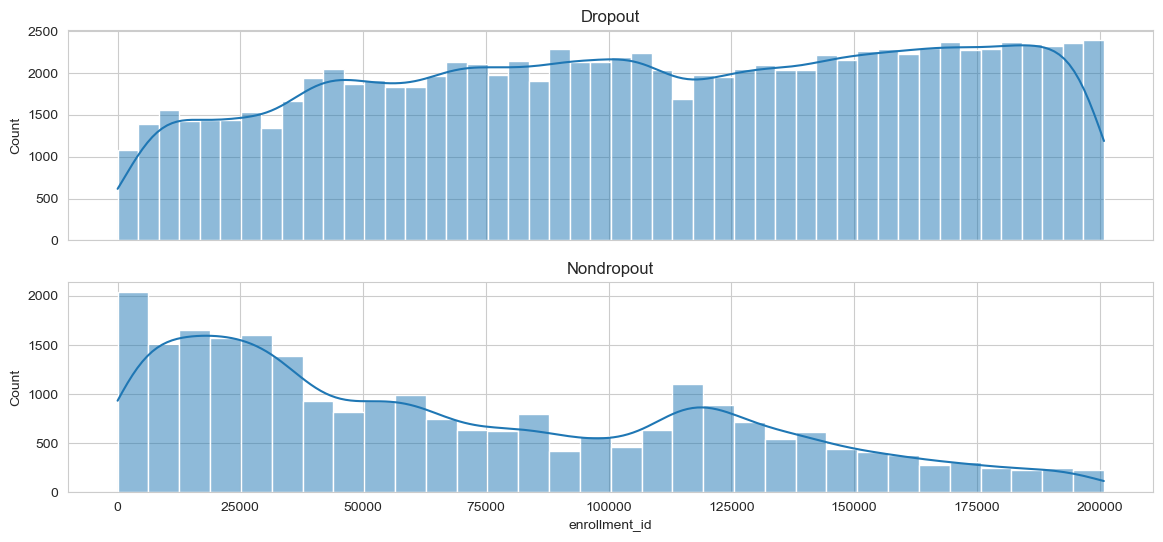

In [2]:
##简单阈值设置
#Fraud----dropout  normal-nondropout  Amount--enrollment_id Class--dropout

###根据dropout列的值将数据集data分割成两部分：dropout_data和nondropout_data
##使用matplotlib和seaborn库绘制了这两部分数据的enrollment_id列的分布图

dropout_data = data[data['dropout']==1]   ###择dropout列值为1的所有行，即标记为dropout的数据
nondropout_data = data[data['dropout']==0]  ###选择dropout列值为0的所有行，即标记为非dropout的数据

f, [ax1, ax2] = plt.subplots(2, 1, sharex=True, figsize=(14,6))  ###创建一个2x1的子图布局，两个子图共享x轴，并设置图的大小为14x6英寸。
                                                                ###f是整个图形对象，ax1和ax2分别是两个子图的轴对象
# sns.distplot(dropout_data['enrollment_id'], ax=ax1)
sns.histplot(dropout_data['enrollment_id'], ax=ax1, kde=True)  
ax1.set_title('Dropout')

# sns.distplot(nondropout_data['enrollment_id'], ax=ax2)
sns.histplot(nondropout_data['enrollment_id'], ax=ax2, kde=True)
ax2.set_title('Nondropout')

plt.savefig('enrollment_id-in-dropout-nondropout.png')

In [3]:
##结论1：dropout的enrollment_id范围和nondropout一样，只是dropout的数量更多

In [4]:
#dropout的enrollment_id范围比nondropout小，可以作为阈值

print('dropout data description')
print(dropout_data["enrollment_id"].describe())
print('')
print('Normal data description')
print(nondropout_data["enrollment_id"].describe())

dropout data description
count     95581.000000
mean     108362.460426
std       56375.412322
min           7.000000
25%       61813.000000
50%      109276.000000
75%      157930.000000
max      200905.000000
Name: enrollment_id, dtype: float64

Normal data description
count     24961.000000
mean      69737.784023
std       53803.157610
min           1.000000
25%       22666.000000
50%       56778.000000
75%      115232.000000
max      200882.000000
Name: enrollment_id, dtype: float64


In [5]:
##结论2: dropout数据量：nondropout数据量大约是5:1，需要下采样

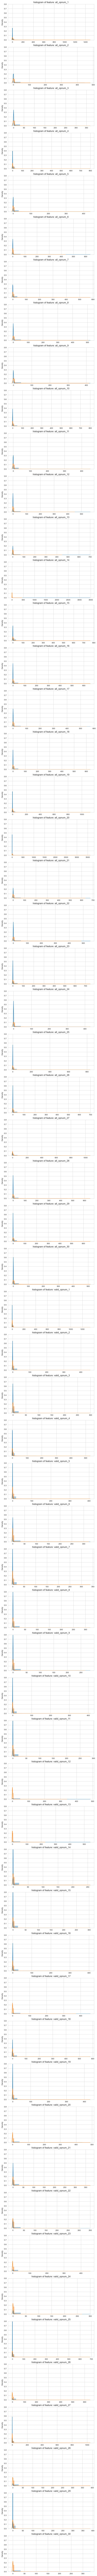

In [7]:
#特征的分布比较
###比较两组数据（dropout_data 和 nondropout_data）中多个特征的分布

v_feat = data.iloc[:,1:61].columns #看all_opnum、valid_opnum   ###从第二列到第61列的特征列
plt.figure(figsize=(8, 60*4))#60为格子数，可以画60个特征图
gs = gridspec.GridSpec(60,1)

###遍历特征并绘制直方图
for i, col in enumerate(v_feat):
    ax = plt.subplot(gs[i])
    sns.distplot(dropout_data[col], bins=10)##bins参数是用于控制直方图分箱（或条柱）的数量的
    sns.distplot(nondropout_data[col], bins=50)
    ax.set_xlabel('')
    #ax.set_ylim(0, 0.15)###统一y轴范围方便比较筛选
    ax.set_ylim(0, 0.8)
    ax.set_title('histogram of feature: ' + str(col))
plt.savefig('all_opnum vs valid_opnum.png')
#分布差异不明显，选择剔除,人眼看，重合越多越不明显

In [8]:
###结论3：相差大的即为明显特征，需要保留；在all_opnum中可以保留的有
#all_opnum_12、all_opnum_16、all_opnum_18、all_opnum_19、all_opnum_20、all_opnum_22、all_opnum_23、all_opnum_24、all_opnum_25、all_opnum_26、all_opnum_28、all_opnum_29、all_opnum_30共13个特征
#vail_opnum中可以保留的有
#valid_opnum_2、valid_opnum_3、valid_opnum_5、valid_opnum_8、valid_opnum_9、valid_opnum_10、valid_opnum_11、valid_opnum_14、valid_opnum_15、valid_opnum_16、valid_opnum_19、valid_opnum_25、valid_opnum_29


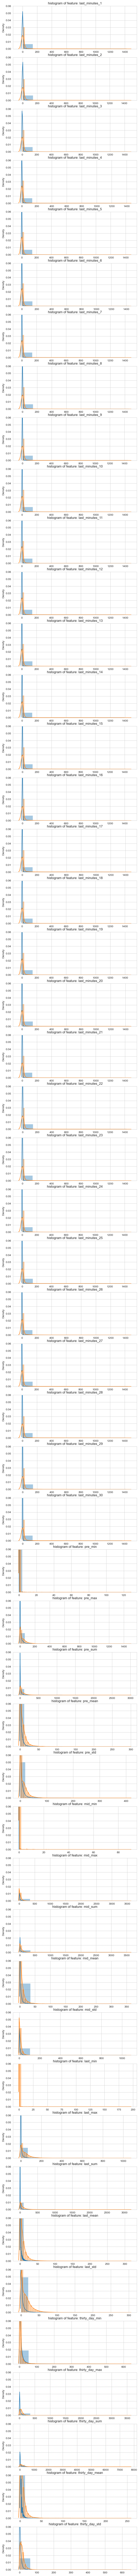

In [9]:
#特征的分布比较
v_feat = data.iloc[:,61:111].columns #看last_minutes、pre、mid、last、thirtyday
plt.figure(figsize=(8, 50*4))#60为格子数，可以画60个特征图
gs = gridspec.GridSpec(60,1)
for i, col in enumerate(v_feat):
    ax = plt.subplot(gs[i])
    sns.distplot(dropout_data[col], bins=10)##bins参数是用于控制直方图分箱（或条柱）的数量的
    sns.distplot(nondropout_data[col], bins=50)
    ax.set_xlabel('')
    ax.set_ylim(0, 0.06)
    ax.set_title('histogram of feature: ' + str(col))
plt.savefig('last_minutes vs pre、mid、last、thirtyday.png')
#分布差异不明显，选择剔除,人眼看，重合越多越不明显

In [10]:
#剔除不明显特征
#删除'all_opnum_1','all_opnum_4','all_opnum_7','all_opnum_10','all_opnum_11','all_opnum_13','all_opnum_14','all_opnum_15','all_opnum_16','all_opnum_17','all_opnum_18','all_opnum_19','all_opnum_20','all_opnum_23','all_opnum_25','all_opnum_26','all_opnum_27','all_opnum_28','all_opnum_29','all_opnum_30'
data_new = data.drop(['all_opnum_1','all_opnum_2','all_opnum_3','all_opnum_4','all_opnum_5','all_opnum_6','all_opnum_7','all_opnum_8','all_opnum_9','all_opnum_10','all_opnum_11','all_opnum_13','all_opnum_14','all_opnum_15','all_opnum_17','all_opnum_21','all_opnum_27'], axis=1)
#删除'valid_opnum_1','valid_opnum_2','valid_opnum_4','valid_opnum_5','valid_opnum_7','valid_opnum_10','valid_opnum_14','valid_opnum_15','valid_opnum_16','valid_opnum_23','valid_opnum_18','valid_opnum_19','valid_opnum_21','valid_opnum_23',,'valid_opnum_25','valid_opnum_26','valid_opnum_27','valid_opnum_29'
data_new=data_new.drop(['valid_opnum_1','valid_opnum_4','valid_opnum_6','valid_opnum_7','valid_opnum_12','valid_opnum_13','valid_opnum_17','valid_opnum_18','valid_opnum_20','valid_opnum_21','valid_opnum_22','valid_opnum_23','valid_opnum_24','valid_opnum_26','valid_opnum_27','valid_opnum_28','valid_opnum_30'],axis=1)

#last_minutes_暂时全部删除
data_new=data_new.drop(['last_minutes_1','last_minutes_2','last_minutes_3','last_minutes_4','last_minutes_5','last_minutes_6','last_minutes_7','last_minutes_8','last_minutes_9','last_minutes_10','last_minutes_11','last_minutes_12','last_minutes_13','last_minutes_14','last_minutes_15','last_minutes_16','last_minutes_17','last_minutes_18','last_minutes_19','last_minutes_20','last_minutes_21','last_minutes_22','last_minutes_23','last_minutes_24','last_minutes_25','last_minutes_26','last_minutes_27','last_minutes_28','last_minutes_29','last_minutes_30'],axis=1)
#其他待研究
data_new=data_new.drop(['pre_min','pre_max','pre_sum','pre_mean','pre_std','mid_min','mid_max','mid_sum','mid_mean','mid_std','last_min','last_max','last_sum','last_mean','last_std','thirty_day_min','thirty_day_max','thirty_day_sum','thirty_day_mean','thirty_day_std'],axis=1)
#其他关联性本身就强的不做研究
data_new=data_new.drop(['username','course_id','course_num','nondropout_num','nondropout_num','nondrop_precent'],axis=1)
##单独删除enrollment_id，后面标准化需要用到
data_new1=data_new.drop(['enrollment_id'],axis=1)
data_new.shape,data_new1.shape


((120542, 28), (120542, 27))

In [11]:
##删除后还剩120542条数据，27个特征

Text(0.5, 1.0, 'Nondropout')

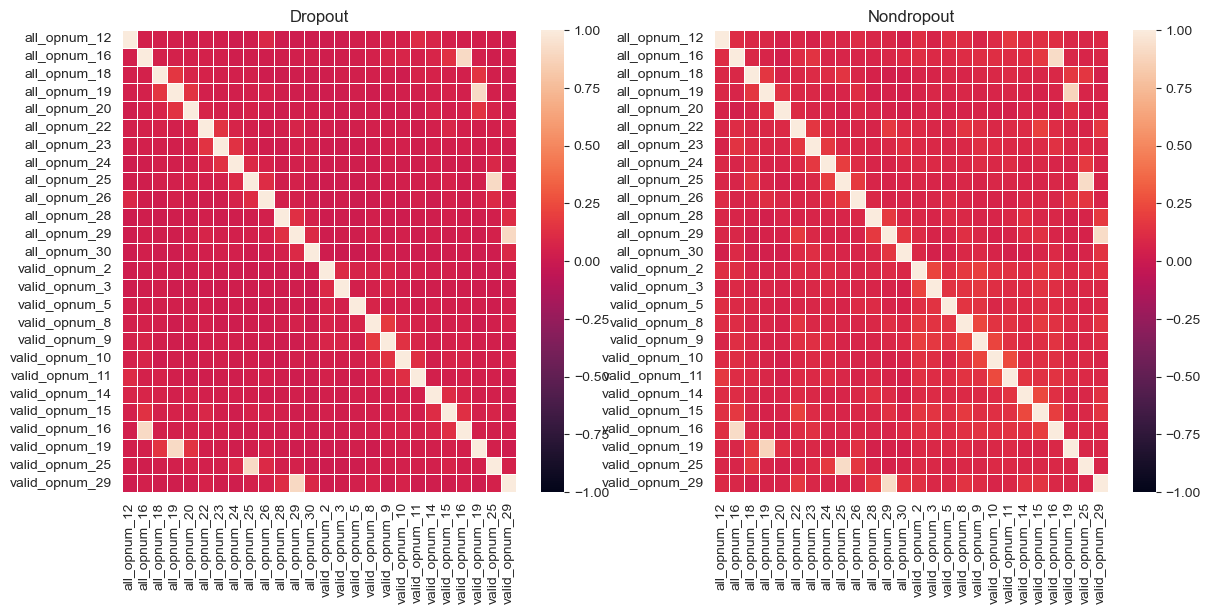

In [12]:
#2.5 查看各特征相关性 特征间关系
dropout_data_new1 = data_new1[data_new1['dropout']==1]
nondropout_data_new1 = data_new1[data_new1['dropout']==0]

f, [ax1, ax2] = plt.subplots(1,2,figsize=(14,6)) ###1,2表示1行2列的子图布局，figsize=(14,6)设置了整个图形窗口的尺寸。
sns.heatmap(dropout_data_new1.drop('dropout', 1).corr(), ax=ax1, vmin=-1, vmax=1,linewidths=.5)##annot=True表示显示系数
ax1.set_title('Dropout')
sns.heatmap(nondropout_data_new1.drop('dropout', 1).corr(), ax=ax2, vmin=-1, vmax=1,linewidths=.5)
ax2.set_title('Nondropout')

In [12]:
###观察颜色等级、比较颜色深浅、分析数据密度、寻找规律

In [13]:
X = data_new1.drop(['dropout'], axis = 'columns')###从 tr_data 中删除名为 'dropout' 的列。参数 axis = 'columns' 指定了操作是沿着列方向进行的（而不是行方向）
Label_Data = data_new1['dropout']
Label_Data.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    0
8    0
9    1
Name: dropout, dtype: int64

In [14]:
# Generate and plot imbalanced classification dataset
###生成并可视化一个不平衡分类数据集
from collections import Counter
from matplotlib import pyplot
from numpy import where
# summarize class distribution
counter = Counter(data_new1['dropout'])###Counter对象来统计data_new1['dropout']列中每个唯一标签的出现次数
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():###遍历counter对象中的每个项
	row_ix = where(data_new1['dropout'] == label)[0]

Counter({1: 95581, 0: 24961})


In [15]:
###上采样来平衡不均衡数据
# transform the dataset
from imblearn.over_sampling import SMOTE###SMOTE是一种过采样技术，用于生成少数类样本，从而平衡数据集中的类别分布
oversample = SMOTE()
###fit_resample方法首先拟合数据（即计算必要的统计信息），然后对数据进行过采样。
###X是特征数据，tr_data['dropout']是标签数据。
###过采样后，得到的平衡数据集被存储在X_r（重新采样的特征数据）和y（重新采样的标签数据）中
X_r, y = oversample.fit_resample(X, data_new1['dropout'])
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]

from sklearn.preprocessing import StandardScaler
## Standardizing the data  数据标准化
X_r2 = StandardScaler().fit_transform(X_r)

Counter({0: 95581, 1: 95581})


In [16]:
from sklearn.model_selection import train_test_split  
X_train,X_test,y_train,y_test = train_test_split(X_r2, y, test_size=0.3)
X_train.shape,y_train.shape 

((133813, 26), (133813,))

In [17]:
X_test.shape,y_test.shape 

((57349, 26), (57349,))

In [20]:
#评价标准及建模
##评价标准：主要采用F1 score，confusion matrix，ROC curve等


In [19]:
##建模比较
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
#新看到的lgb算法，比xgb更快，精度差不多，引入尝试效果
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.metrics import confusion_matrix#导入库ConfusionMatrixDisplay
##from sklearn.metrics import plot_confusion_matrix##scikit-learn1.2以上不能用
from sklearn.metrics import  ConfusionMatrixDisplay#导入库ConfusionMatrixDisplay
from sklearn.metrics import roc_curve  
import matplotlib.pyplot as plt
from sklearn import metrics  
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score  

<Figure size 640x480 with 0 Axes>

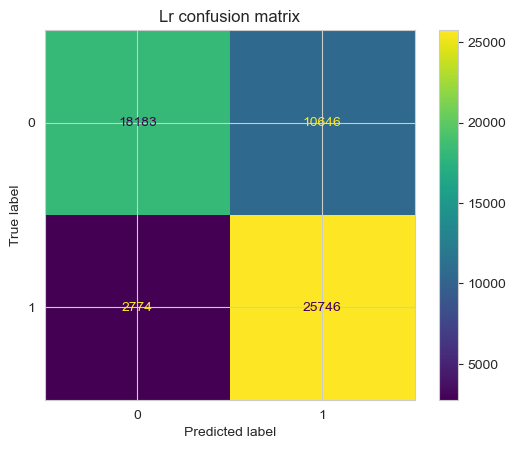

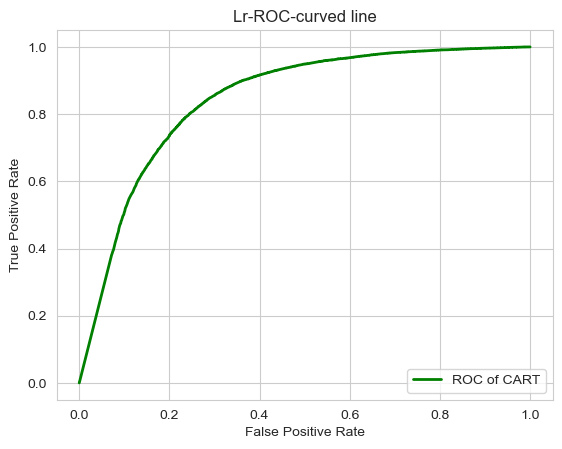

Accuracy_Lr: 0.7660
Precision_Lr: 0.7075
Recall_Lr: 0.9027
F1-score_Lr: 0.7933


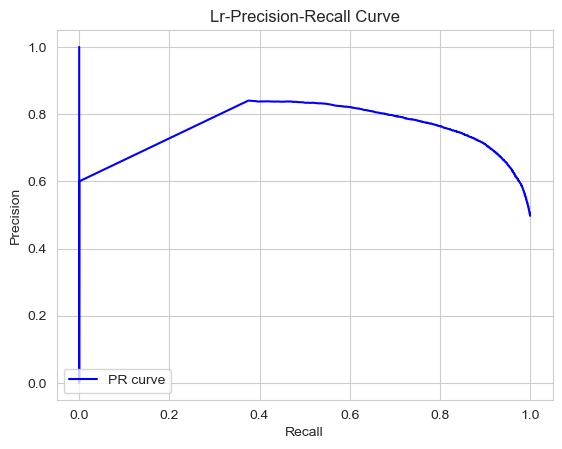

In [20]:
## LogisticRegression
lr = LogisticRegression()
# lr.fit(X_train_rus, y_train_rus)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_score = lr.decision_function(X_test)

# Confusion maxtrix & metrics
# 计算混淆矩阵  
##cm = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred,labels=lr.classes_)
class_names = [0,1]
plt.figure()#创建一个新的图形窗口或激活一个已存在的图形窗口
# 创建ConfusionMatrixDisplay对象 
#plot_confusion_matrix(cm, classes=class_names, title='Lr confusion matrix')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)#display_labels：这是一个可选参数，用于指定混淆矩阵中每一类的显示标签。它应该是一个一维数组或列表，其长度与混淆矩阵的行数（或列数）相同。如果没有提供，标签将默认为从0到类别数减1的整数。
# 绘制混淆矩阵
disp.plot()
# 添加标题 
plt.title('Lr confusion matrix')  
# 显示图形
plt.show()

##show_metrics()

# 计算ROC曲线的数据点 
fpr_lr, tpr_lr, thresholds  = roc_curve(y_test, y_score)#fpr（假正率）tpr（真正率）
# print(y_test)
# print("\n")
# print(y_pred)
plt.plot(fpr_lr, tpr_lr, linewidth=2, label = 'ROC of CART', color = 'green') #作出ROC曲线
plt.xlabel('False Positive Rate') #坐标轴标签
plt.ylabel('True Positive Rate') #坐标轴标签
##plt.ylim(0,1.05) #边界范围
##plt.xlim(0,1.05) #边界范围
plt.title('Lr-ROC-curved line')  
plt.legend(loc=4) #图例
plt.show() #显示作图结果
##plot_roc()

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy_Lr: {accuracy:.4f}')  

# 计算精确率、召回率和F1分数  
precision_lr = precision_score(y_test, y_pred)  
recall_lr = recall_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred)  

# 输出结果  
print(f'Precision_Lr: {precision_lr:.4f}')  
print(f'Recall_Lr: {recall_lr:.4f}')  
print(f'F1-score_Lr: {f1:.4f}')

# 计算精确度和召回率的数据点 
precision_lr, recall_lr, thresholds_lr = metrics.precision_recall_curve(y_test, y_score)
plt.plot(recall_lr, precision_lr, color='b', label='PR curve')  
plt.xlabel('Recall')  
plt.ylabel('Precision')  
# plt.ylim([0.0, 1.05])  
# plt.xlim([0.0, 1.0])  
plt.title('Lr-Precision-Recall Curve')  
plt.legend(loc="lower left")  
plt.show()
##plot_precision_recall()

<Figure size 640x480 with 0 Axes>

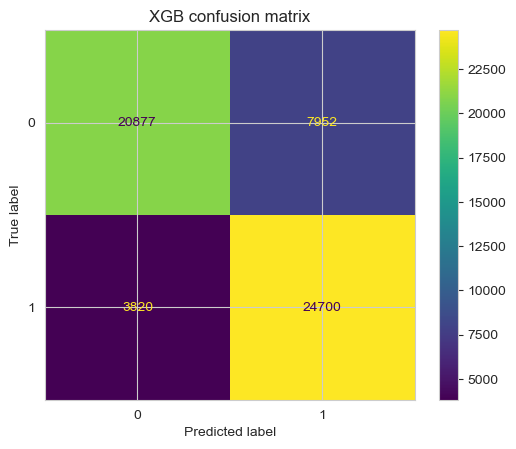

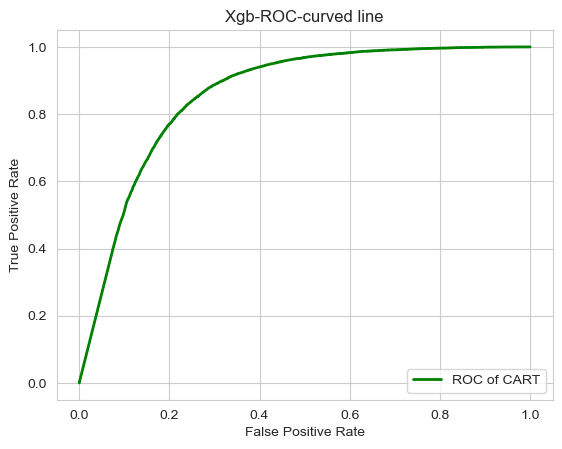

Accuracy_Xgb: 0.7947
Precision_Xgb: 0.7565
Recall_Xgb: 0.8661
F1-score_Xgb: 0.8076


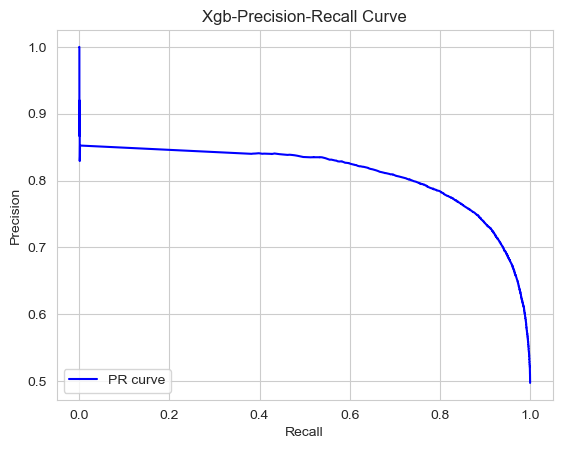

In [21]:
# Extreme Gradient Boosting (XGB)

xgb_cf = xgb.XGBClassifier(n_jobs = -1)
# xgb_cf.fit(X_train_rus, y_train_rus)
xgb_cf.fit(X_train, y_train)
y_pred = xgb_cf.predict(X_test)
y_score = xgb_cf.predict_proba(X_test)[:,1]

# Confusion maxtrix & metrics

cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
# plot_confusion_matrix(cm, 
#                       classes=class_names, 
#                       title='XGB confusion matrix')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb_cf.classes_)
disp.plot()    
# 添加标题 
plt.title('XGB confusion matrix')  
plt.show()

##show_metrics()

# ROC curve
# fpr, tpr, t = roc_curve(y_test, y_score)
# plot_roc()
fpr_xgb, tpr_xgb, thresholds  = roc_curve(y_test, y_score)#fpr（假正率）tpr（真正率）

plt.plot(fpr_xgb, tpr_xgb, linewidth=2, label = 'ROC of CART', color = 'green') #作出ROC曲线
plt.xlabel('False Positive Rate') #坐标轴标签
plt.ylabel('True Positive Rate') #坐标轴标签
##plt.ylim(0,1.05) #边界范围
##plt.xlim(0,1.05) #边界范围
plt.title('Xgb-ROC-curved line')  
plt.legend(loc=4) #图例
plt.show() #显示作图结果
##plot_roc()
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy_Xgb: {accuracy:.4f}')  
# 计算精确率、召回率和F1分数  
precision_xgb = precision_score(y_test, y_pred)  
recall_xgb = recall_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred)  
# 输出结果  
print(f'Precision_Xgb: {precision_xgb:.4f}')  
print(f'Recall_Xgb: {recall_xgb:.4f}')  
print(f'F1-score_Xgb: {f1:.4f}')


# Precision-recall curve
# precisionxgb, recall, thresholds = precision_recall_curve(y_test, y_score)
#plot_precision_recall()

# fpr_xgb, tpr_xgb, t_xgb = fpr, tpr, t
# precision_xgb, recall_xgb, thresholds_xgb = precision, recall, thresholds
precision_xgb, recall_xgb, thresholds_xgb = metrics.precision_recall_curve(y_test, y_score)
plt.plot(recall_xgb, precision_xgb, color='b', label='PR curve')  
plt.xlabel('Recall')  
plt.ylabel('Precision')  
# plt.ylim([0.0, 1.05])  
# plt.xlim([0.0, 1.0])  
plt.title('Xgb-Precision-Recall Curve')  
plt.legend(loc="lower left")  
plt.show()
##plot_precision_recall()



In [22]:
#参数优化
from sklearn.model_selection import GridSearchCV
param_grid = {
            'n_estimators': [100, 200, 300]
              }

CV_xgb_cf = GridSearchCV(estimator = xgb_cf, param_grid = param_grid, scoring ='f1', verbose = 2)
# CV_xgb_cf.fit(X_train_rus, y_train_rus)
CV_xgb_cf.fit(X_train, y_train)
best_parameters = CV_xgb_cf.best_params_
print("The best parameters for using this model is", best_parameters)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ...................................n_estimators=100; total time=   0.3s
[CV] END ...................................n_estimators=100; total time=   0.3s
[CV] END ...................................n_estimators=100; total time=   0.3s
[CV] END ...................................n_estimators=100; total time=   0.3s
[CV] END ...................................n_estimators=100; total time=   0.3s
[CV] END ...................................n_estimators=200; total time=   0.7s
[CV] END ...................................n_estimators=200; total time=   0.7s
[CV] END ...................................n_estimators=200; total time=   0.7s
[CV] END ...................................n_estimators=200; total time=   0.7s
[CV] END ...................................n_estimators=200; total time=   0.7s
[CV] END ...................................n_estimators=300; total time=   1.0s
[CV] END ...................................n_est

<Figure size 640x480 with 0 Axes>

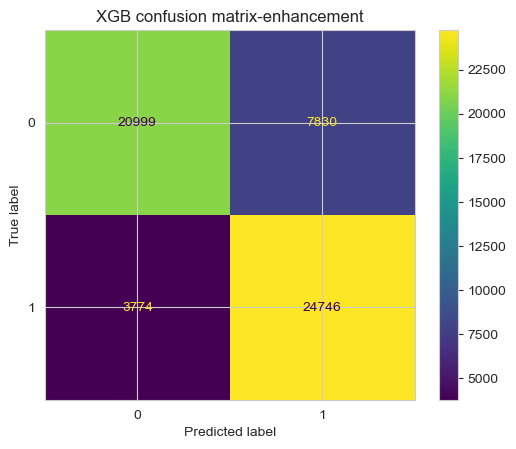

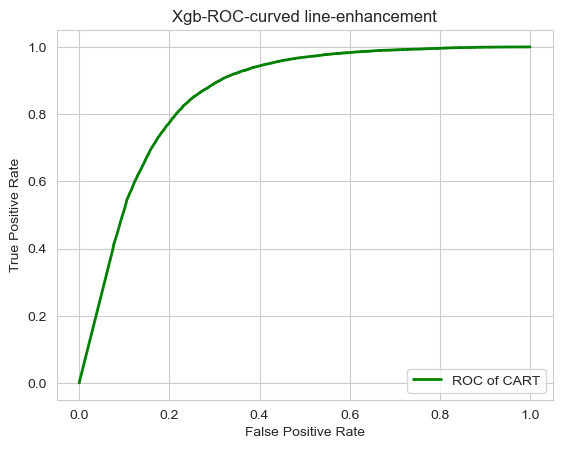

Accuracy_Xgb_enhancement: 0.7977
Precision_Xgb_enhancement: 0.7596
Recall_Xgb_enhancement: 0.8677
F1-score_Xgb_enhancement: 0.8101


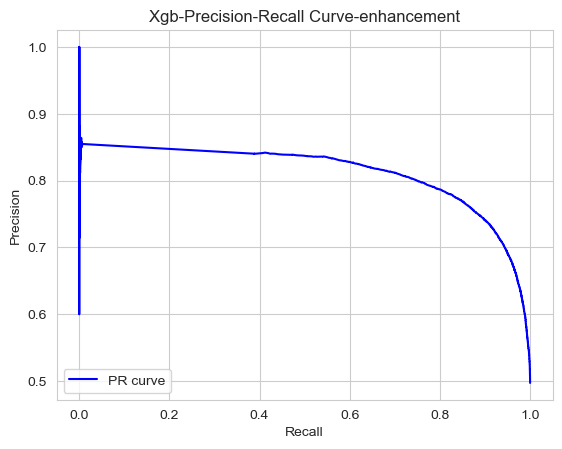

In [23]:
##将需要优化的参数减少，终于优化了一组参数
xgb_cf = xgb.XGBClassifier(n_estimators=best_parameters['n_estimators'], n_jobs = -1)
# xgb_cf.fit(X_train_rus, y_train_rus)
xgb_cf.fit(X_train, y_train)
y_pred = xgb_cf.predict(X_test)
y_score = xgb_cf.predict_proba(X_test)[:,1]

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
# plot_confusion_matrix(cm, 
#                       classes=class_names, 
#                       title='XGB confusion matrix')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb_cf.classes_)
disp.plot()
# 添加标题 
plt.title('XGB confusion matrix-enhancement')  
# 显示图形
plt.show()


# ROC curve
fpr_xgb, tpr_xgb, thresholds   = roc_curve(y_test, y_score)
plt.plot(fpr_xgb, tpr_xgb, linewidth=2, label = 'ROC of CART', color = 'green') #作出ROC曲线
plt.xlabel('False Positive Rate') #坐标轴标签
plt.ylabel('True Positive Rate') #坐标轴标签
##plt.ylim(0,1.05) #边界范围
##plt.xlim(0,1.05) #边界范围
plt.title('Xgb-ROC-curved line-enhancement')  
plt.legend(loc=4) #图例
plt.show() #显示作图结果
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy_Xgb_enhancement: {accuracy:.4f}')  
# 计算精确率、召回率和F1分数  
precision_xgb = precision_score(y_test, y_pred)  
recall_xgb = recall_score(y_test, y_pred)  
f1_xgb = f1_score(y_test, y_pred)  
# 输出结果  
print(f'Precision_Xgb_enhancement: {precision_xgb:.4f}')  
print(f'Recall_Xgb_enhancement: {recall_xgb:.4f}')  
print(f'F1-score_Xgb_enhancement: {f1_xgb:.4f}')
# Precision-recall curve
# precision, recall, thresholds = precision_recall_curve(y_test, y_score)
# plot_precision_recall()

# fpr_xgb, tpr_xgb, t_xgb = fpr, tpr, t
# precision_xgb, recall_xgb, thresholds_xgb = precision, recall, thresholds
precision_xgb, recall_xgb, thresholds_xgb = metrics.precision_recall_curve(y_test, y_score)
plt.plot(recall_xgb, precision_xgb, color='b', label='PR curve')  
plt.xlabel('Recall')  
plt.ylabel('Precision')  
# plt.ylim([0.0, 1.05])  
# plt.xlim([0.0, 1.0])  
plt.title('Xgb-Precision-Recall Curve-enhancement')  
plt.legend(loc="lower left")  
plt.show()
##plot_precision_recall()


[LightGBM] [Info] Number of positive: 67061, number of negative: 66752
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4899
[LightGBM] [Info] Number of data points in the train set: 133813, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501155 -> initscore=0.004618
[LightGBM] [Info] Start training from score 0.004618


<Figure size 640x480 with 0 Axes>

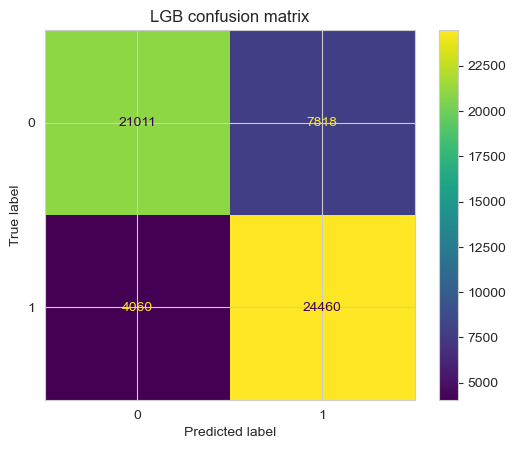

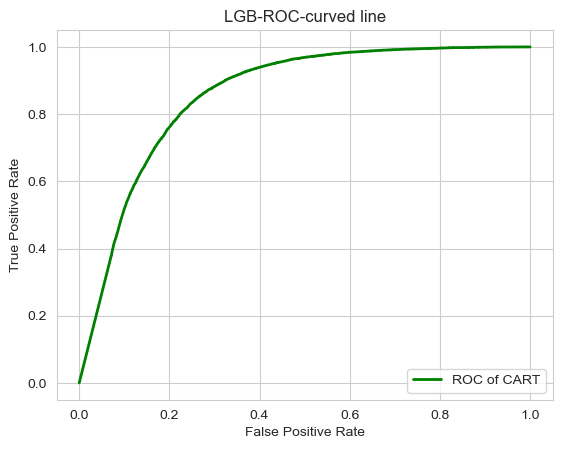

Accuracy_Lgb: 0.7929
Precision_Lgb: 0.7578
Recall_Lgb: 0.8576
F1-score_Lgb: 0.8046


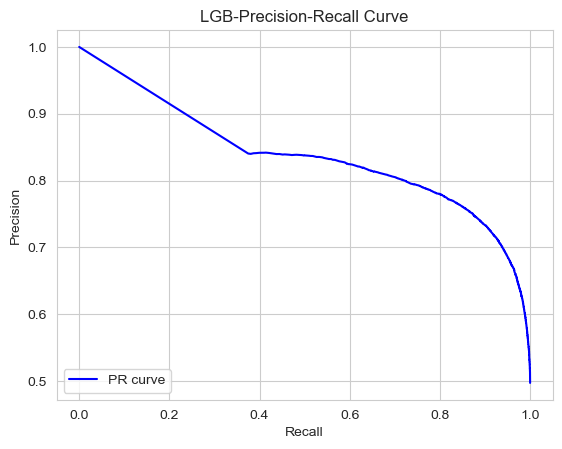

In [24]:
##LightGBM

#这个是新看到的算法，还不太清楚该怎么设置参数，只是按照默认值建模的，速度确实很快。
lgb_cf = lgb.LGBMClassifier()
# lgb_cf.fit(X_train_rus, y_train_rus)
lgb_cf.fit(X_train, y_train)
y_pred = lgb_cf.predict(X_test)
y_score = lgb_cf.predict_proba(X_test)[:,1]

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
# plot_confusion_matrix(cm, 
#                       classes=class_names, 
#                       title='LGB confusion matrix')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lgb_cf.classes_)#display_labels：这是一个可选参数，用于指定混淆矩阵中每一类的显示标签。它应该是一个一维数组或列表，其长度与混淆矩阵的行数（或列数）相同。如果没有提供，标签将默认为从0到类别数减1的整数。
# 绘制混淆矩阵
disp.plot()
# 添加标题 
plt.title('LGB confusion matrix')  
# 显示图形
plt.show()


# ROC curve
fpr_lgb, tpr_lgb, thresholds  = roc_curve(y_test, y_score)#fpr（假正率）tpr（真正率）

plt.plot(fpr_lgb, tpr_lgb, linewidth=2, label = 'ROC of CART', color = 'green') #作出ROC曲线
plt.xlabel('False Positive Rate') #坐标轴标签
plt.ylabel('True Positive Rate') #坐标轴标签
##plt.ylim(0,1.05) #边界范围
##plt.xlim(0,1.05) #边界范围
plt.title('LGB-ROC-curved line')  
plt.legend(loc=4) #图例
plt.show() #显示作图结果
##plot_roc()
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy_Lgb: {accuracy:.4f}')  
# 计算精确率、召回率和F1分数  
precision_lgb = precision_score(y_test, y_pred)  
recall_lgb = recall_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred)  
  
# 输出结果  
print(f'Precision_Lgb: {precision_lgb:.4f}')  
print(f'Recall_Lgb: {recall_lgb:.4f}')  
print(f'F1-score_Lgb: {f1:.4f}')


# Precision-recall curve
# precision, recall, thresholds = precision_recall_curve(y_test, y_score)
# plot_precision_recall()

# fpr_lgb, tpr_lgb, t_lgb = fpr, tpr, t
# precision_lgb, recall_lgb, thresholds_lgb = precision, recall, thresholds
precision_lgb, recall_lgb, thresholds = metrics.precision_recall_curve(y_test, y_score)
plt.plot(recall_lgb, precision_lgb, color='b', label='PR curve')  
plt.xlabel('Recall')  
plt.ylabel('Precision')  
# plt.ylim([0.0, 1.05])  
# plt.xlim([0.0, 1.0])  
plt.title('LGB-Precision-Recall Curve')  
plt.legend(loc="lower left")  
plt.show()
##plot_precision_recall()


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[LightGBM] [Info] Number of positive: 53649, number of negative: 53401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007659 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4654
[LightGBM] [Info] Number of data points in the train set: 107050, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501158 -> initscore=0.004633
[LightGBM] [Info] Start training from score 0.004633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

<Figure size 640x480 with 0 Axes>

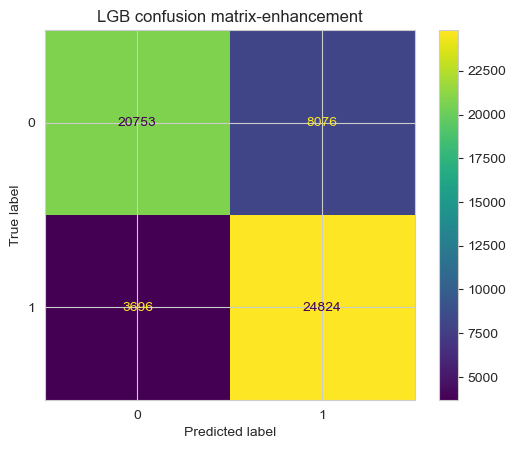

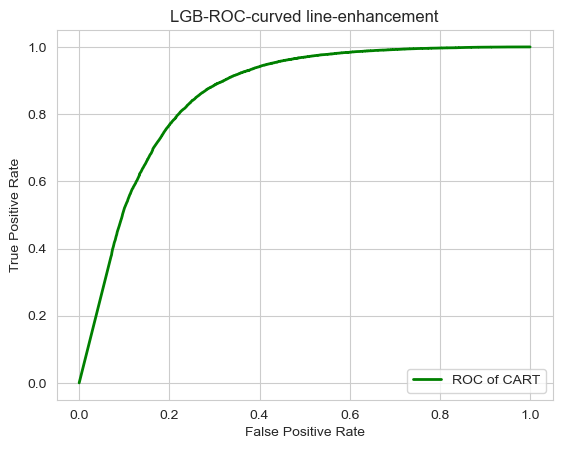

Accuracy_Lgb_enhancement: 0.7947
Precision_Lgb_enhancement: 0.7545
Recall_Lgb_enhancement: 0.8704
F1-score_Lgb_enhancement: 0.8083


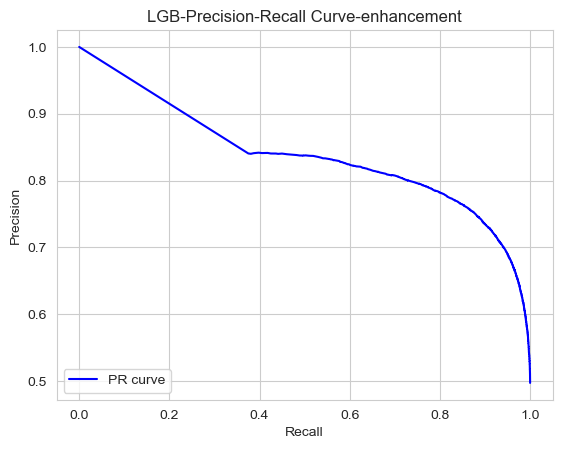

In [25]:
#参数优化
param_grid = {
            'max_depth': [4,6,8],
            'num_leaves': [40,64,88]       
              }

CV_lgb_cf = GridSearchCV(estimator = lgb_cf, param_grid = param_grid, scoring ='f1', verbose = 2)
# CV_lgb_cf.fit(X_train_rus, y_train_rus)
CV_lgb_cf.fit(X_train, y_train)

best_parameters = CV_lgb_cf.best_params_
print("The best parameters for using this model is", best_parameters)

lgb_cf = lgb.LGBMClassifier(max_depth=best_parameters['max_depth'], num_leaves=best_parameters['num_leaves'])
# lgb_cf.fit(X_train_rus, y_train_rus)
lgb_cf.fit(X_train, y_train)
y_pred = lgb_cf.predict(X_test)
y_score = lgb_cf.predict_proba(X_test)[:,1]

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
# plot_confusion_matrix(cm, 
#                       classes=class_names, 
#                       title='LGB confusion matrix')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lgb_cf.classes_)#display_labels：这是一个可选参数，用于指定混淆矩阵中每一类的显示标签。它应该是一个一维数组或列表，其长度与混淆矩阵的行数（或列数）相同。如果没有提供，标签将默认为从0到类别数减1的整数。
# 绘制混淆矩阵
disp.plot()
# 添加标题 
plt.title('LGB confusion matrix-enhancement')  
# 显示图形
plt.show()


# ROC curve
fpr_lgb, tpr_lgb, thresholds  = roc_curve(y_test, y_score)#fpr（假正率）tpr（真正率）

plt.plot(fpr_lgb, tpr_lgb, linewidth=2, label = 'ROC of CART', color = 'green') #作出ROC曲线
plt.xlabel('False Positive Rate') #坐标轴标签
plt.ylabel('True Positive Rate') #坐标轴标签
##plt.ylim(0,1.05) #边界范围
##plt.xlim(0,1.05) #边界范围
plt.title('LGB-ROC-curved line-enhancement')  
plt.legend(loc=4) #图例
plt.show() #显示作图结果
##plot_roc()
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy_Lgb_enhancement: {accuracy:.4f}')  
# 计算精确率、召回率和F1分数  
precision_lgb = precision_score(y_test, y_pred)  
recall_lgb = recall_score(y_test, y_pred)  
f1_lgb = f1_score(y_test, y_pred)  
  
# 输出结果  
print(f'Precision_Lgb_enhancement: {precision_lgb:.4f}')  
print(f'Recall_Lgb_enhancement: {recall_lgb:.4f}')  
print(f'F1-score_Lgb_enhancement: {f1_lgb:.4f}')


# Precision-recall curve
# precision, recall, thresholds = precision_recall_curve(y_test, y_score)
# plot_precision_recall()

# fpr_lgb, tpr_lgb, t_lgb = fpr, tpr, t
# precision_lgb, recall_lgb, thresholds_lgb = precision, recall, thresholds
precision_lgb, recall_lgb, thresholds_lgb = metrics.precision_recall_curve(y_test, y_score)
plt.plot(recall_lgb, precision_lgb, color='b', label='PR curve')  
plt.xlabel('Recall')  
plt.ylabel('Precision')  
# plt.ylim([0.0, 1.05])  
# plt.xlim([0.0, 1.0])  
plt.title('LGB-Precision-Recall Curve-enhancement')  
plt.legend(loc="lower left")  
plt.show()
##plot_precision_recall()


<Figure size 640x480 with 0 Axes>

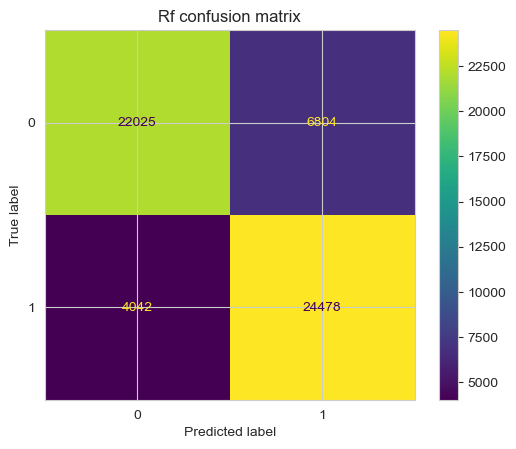

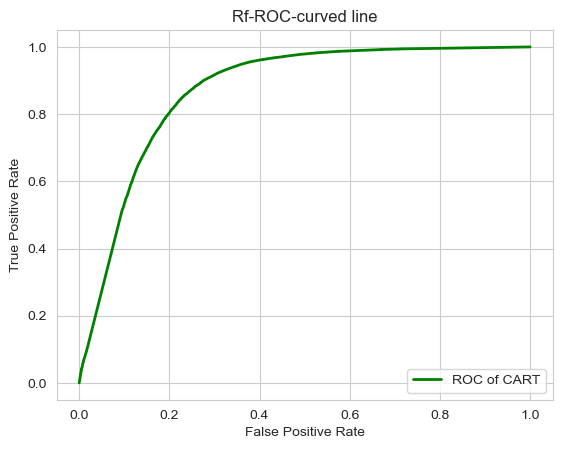

Accuracy_Rf: 0.8109
Precision_Rf: 0.7825
Recall_Rf: 0.8583
F1-score_Rf: 0.8186


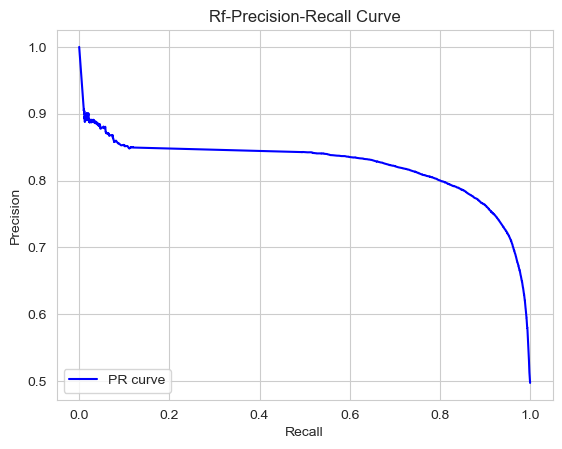

In [26]:
# RandomForest
rf = RandomForestClassifier(n_jobs = -1,
                            random_state = 1)

# rf.fit(X_train_rus, y_train_rus)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_score = rf.predict_proba(X_test)[:,1]

# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
# plot_confusion_matrix(cm, 
#                       classes = class_names, 
#                       title = 'RF Confusion matrix')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)#display_labels：这是一个可选参数，用于指定混淆矩阵中每一类的显示标签。它应该是一个一维数组或列表，其长度与混淆矩阵的行数（或列数）相同。如果没有提供，标签将默认为从0到类别数减1的整数。
# 绘制混淆矩阵
disp.plot()
# 添加标题 
plt.title('Rf confusion matrix')  
# 显示图形
plt.show()

##show_metrics()

# 计算ROC曲线的数据点 
fpr_rf, tpr_rf, thresholds  = roc_curve(y_test, y_score)#fpr（假正率）tpr（真正率）

plt.plot(fpr_rf, tpr_rf, linewidth=2, label = 'ROC of CART', color = 'green') #作出ROC曲线
plt.xlabel('False Positive Rate') #坐标轴标签
plt.ylabel('True Positive Rate') #坐标轴标签
##plt.ylim(0,1.05) #边界范围
##plt.xlim(0,1.05) #边界范围
plt.title('Rf-ROC-curved line')  
plt.legend(loc=4) #图例
plt.show() #显示作图结果
##plot_roc()
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy_Rf: {accuracy:.4f}')  
# 计算精确率、召回率和F1分数  
precision_rf = precision_score(y_test, y_pred)  
recall_rf = recall_score(y_test, y_pred)  
f1_rf = f1_score(y_test, y_pred)  
  
# 输出结果  
print(f'Precision_Rf: {precision_rf:.4f}')  
print(f'Recall_Rf: {recall_rf:.4f}')  
print(f'F1-score_Rf: {f1_rf:.4f}')

# 计算精确度和召回率的数据点 
precision_rf, recall_rf, thresholds_rf = metrics.precision_recall_curve(y_test, y_score)
plt.plot(recall_rf, precision_rf, color='b', label='PR curve')  
plt.xlabel('Recall')  
plt.ylabel('Precision')  
# plt.ylim([0.0, 1.05])  
# plt.xlim([0.0, 1.0])  
plt.title('Rf-Precision-Recall Curve')  
plt.legend(loc="lower left")  
plt.show()
##plot_precision_recall()


[LightGBM] [Info] Number of positive: 67061, number of negative: 66752
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4899
[LightGBM] [Info] Number of data points in the train set: 133813, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501155 -> initscore=0.004618
[LightGBM] [Info] Start training from score 0.004618
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


<Figure size 640x480 with 0 Axes>

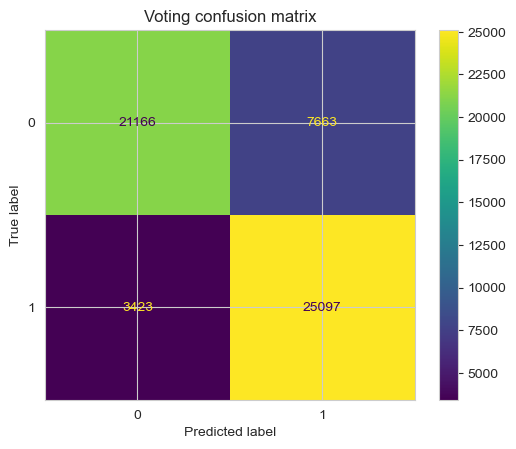

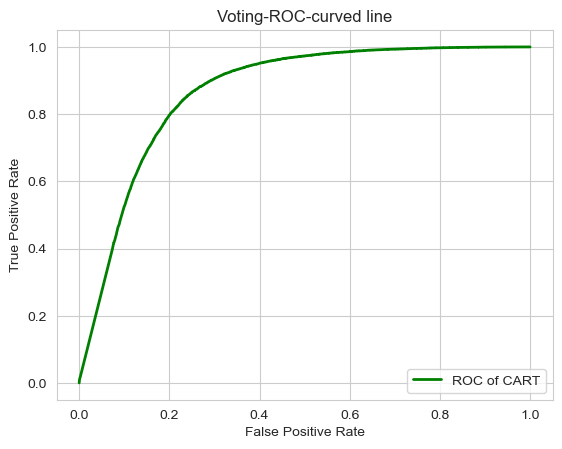

Accuracy__voting: 0.8067
Precision__voting: 0.7661
Recall__voting: 0.8800
F1-score__voting: 0.8191


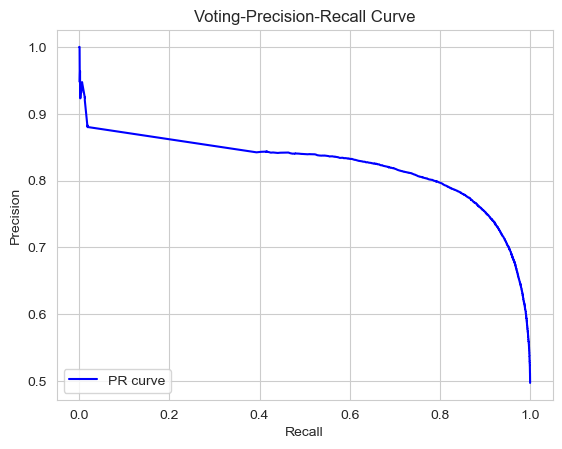

In [27]:
# Voting Classifier
voting_cf = VotingClassifier (
        estimators = [('xgb', xgb_cf), ('lr', lr), ('rf', rf), ('lgb', lgb_cf)],
                     voting='soft', weights = [1.2, 1, 1.2, 1])
    
# voting_cf.fit(X_train_rus, y_train_rus)
voting_cf.fit(X_train, y_train)

y_pred = voting_cf.predict(X_test)
y_score = voting_cf.predict_proba(X_test)[:,1]

# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
# plot_confusion_matrix(cm, 
#                       classes = class_names, 
#                       title = 'VOTING Confusion matrix')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=voting_cf.classes_)#display_labels：这是一个可选参数，用于指定混淆矩阵中每一类的显示标签。它应该是一个一维数组或列表，其长度与混淆矩阵的行数（或列数）相同。如果没有提供，标签将默认为从0到类别数减1的整数。
# 绘制混淆矩阵
disp.plot()
# 添加标题 
plt.title('Voting confusion matrix')  
# 显示图形
plt.savefig('1.voting_confusion_matrix.png')
plt.show()

# show_metrics()

# ROC curve
# fpr, tpr, t = roc_curve(y_test, y_score)
# plot_roc()
fpr_voting, tpr_voting, thresholds  = roc_curve(y_test, y_score)#fpr（假正率）tpr（真正率）

plt.plot(fpr_voting, tpr_voting, linewidth=2, label = 'ROC of CART', color = 'green') #作出ROC曲线
plt.xlabel('False Positive Rate') #坐标轴标签
plt.ylabel('True Positive Rate') #坐标轴标签
##plt.ylim(0,1.05) #边界范围
##plt.xlim(0,1.05) #边界范围
plt.title('Voting-ROC-curved line')  
plt.legend(loc=4) #图例
plt.show() #显示作图结果
##plot_roc()
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy__voting: {accuracy:.4f}')  
# 计算精确率、召回率和F1分数  
precision_voting = precision_score(y_test, y_pred)  
recall_voting = recall_score(y_test, y_pred)  
f1_voting = f1_score(y_test, y_pred)  
  
# 输出结果  
print(f'Precision__voting: {precision_voting:.4f}')  
print(f'Recall__voting: {recall_voting:.4f}')  
print(f'F1-score__voting: {f1_voting:.4f}')

# Precision-recall curve
# precision, recall, thresholds = precision_recall_curve(y_test, y_score)
# plot_precision_recall()

# fpr_voting, tpr_voting, t_voting = fpr, tpr, t
# precision_voting, recall_voting, thresholds_voting = precision, recall, thresholds
precision_voting, recall_voting, thresholds_voting = metrics.precision_recall_curve(y_test, y_score)
plt.plot(recall_voting, precision_voting, color='b', label='PR curve')  
plt.xlabel('Recall')  
plt.ylabel('Precision')  
# plt.ylim([0.0, 1.05])  
# plt.xlim([0.0, 1.0])  
plt.title('Voting-Precision-Recall Curve')  
plt.legend(loc="lower left")  
plt.show()


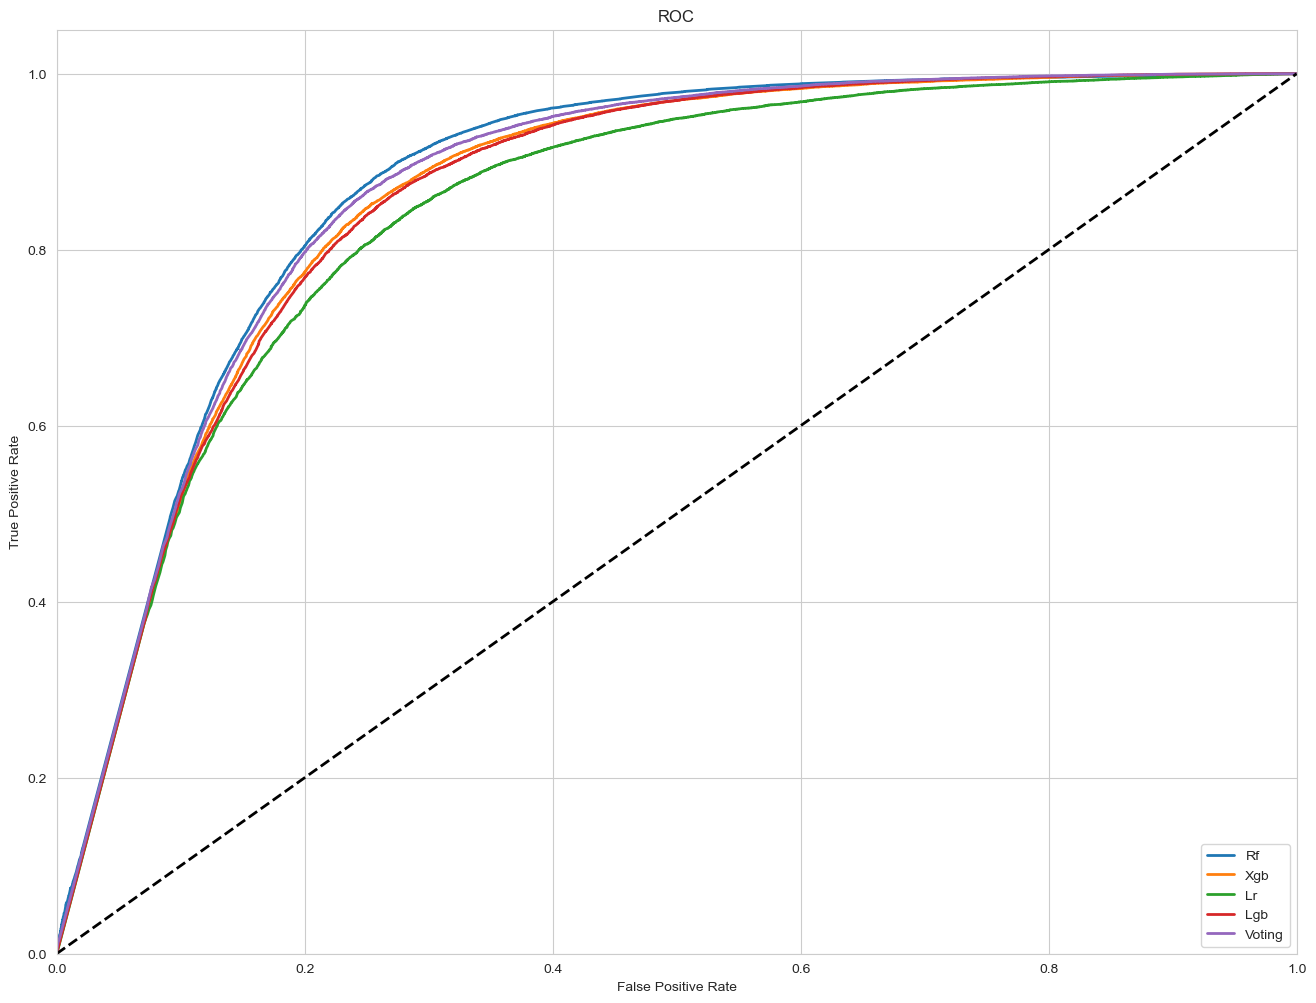

In [28]:
# ROC曲线比较
def roc_curve_all_models () : 
    plt.figure(figsize=(16, 12))
    plt.plot(fpr_rf, tpr_rf, label = 'ROC curve', linewidth = 2)
    plt.plot(fpr_xgb, tpr_xgb, label = 'ROC curve', linewidth = 2)
    plt.plot(fpr_lr, tpr_lr, label = 'ROC curve', linewidth = 2)
    plt.plot(fpr_lgb, tpr_lgb, label = 'ROC curve', linewidth = 2)
    plt.plot(fpr_voting, tpr_voting, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(['Rf','Xgb', 'Lr', 'Lgb', 'Voting'], loc='lower right')
    plt.show()

roc_curve_all_models ()


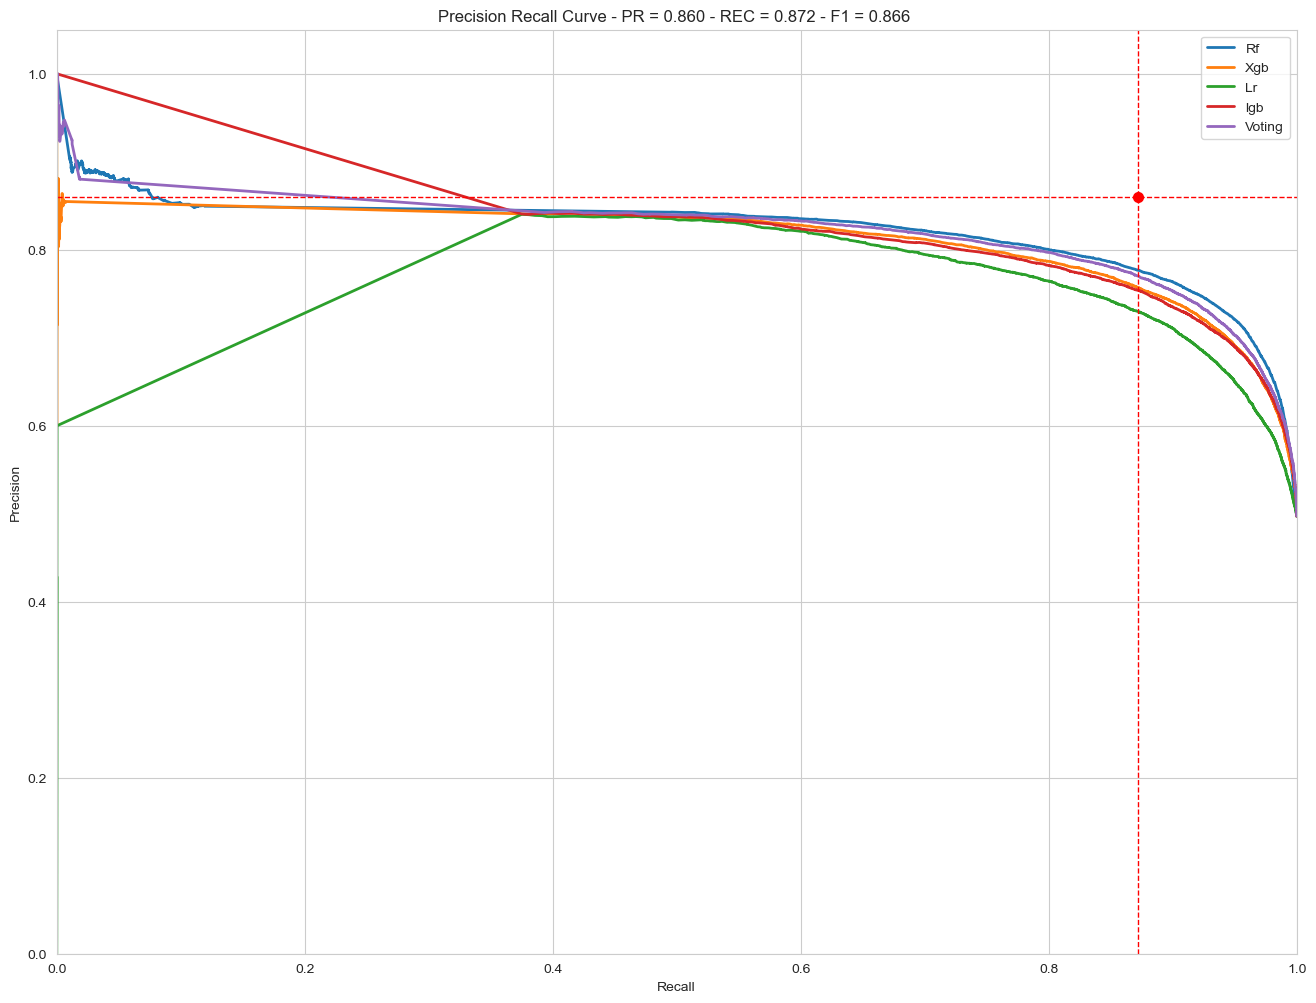

In [29]:
# Precision Recall曲线比较
def prec_recall_all_models () :
    plt.figure(figsize=(16, 12))
    plt.plot(recall_rf, precision_rf, linewidth = 2)
    plt.plot(recall_xgb, precision_xgb, linewidth = 2)
    plt.plot(recall_lr, precision_lr, linewidth = 2)
    plt.plot(recall_lgb, precision_lgb, linewidth = 2)
    plt.plot(recall_voting, precision_voting, linewidth = 2)
    plt.scatter(rec, pr, linewidth = 2, color = 'red')
    plt.axvline(rec, color = 'red', linewidth = 1, linestyle='--')
    plt.axhline(pr, color = 'red', linewidth = 1, linestyle='--')
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve - PR = 0.860 - REC = 0.872 - F1 = 0.866 ')
    plt.legend(['Rf', 'Xgb', 'Lr', 'lgb', 'Voting'], loc='upper right')
    plt.savefig('7.prec_recc.png')
    plt.show()

pr = 0.860
rec = 0.872
prec_recall_all_models ();